<a href="https://colab.research.google.com/github/raminass/Software-Project/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**: Rami Nasser (raminass@gmail.com)


# Earlier

*   Numpy
*   Scipy
*   Matplotlib

# Today 

*   Pandas









#Pandas

**Learning Objectives:**
  * Gain an introduction to the `DataFrame` and `Series` data structures of the *pandas* library
  * Access and manipulate data within a `DataFrame` and `Series`
  * Import CSV data into a *pandas* `DataFrame`


[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analyzing input data, and many ML frameworks support *pandas* data structures as inputs.
Although a comprehensive introduction to the *pandas* API would span many pages, the core concepts are fairly straightforward, and we'll present them below. For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.

##Setup

Install

In [ ]:
!pip install pandas

Import - External Package

In [1]:
import pandas as pd

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in [Spark](https://spark.apache.org/) and [R](https://www.r-project.org/about.html).

##Series

One way to create a `Series` is to construct a `Series` object. For example:

In [ ]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

## Creating Data

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [3]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])
pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


Missing Values:

In [ ]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 485199])
pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469.0
1,San Jose,485199.0
2,Sacramento,NaN


A DataFrame is a table(excel sheet). It contains an array of individual entries, each of which has a certain value. Each entry corresponds to a row (or record) and a column.

For example, consider the following simple DataFrame:

In [ ]:
pd.DataFrame({'A': [50, 21], 'B': [131, 2]})

,A,B
0,50,131
1,21,2


The dictionary-list constructor assigns values to the column labels, but just uses an ascending count from 0 (0, 1, 2, 3, ...) for the row labels. Sometimes this is OK, but oftentimes we will want to assign these labels ourselves.

The list of row labels used in a DataFrame is known as an Index. We can assign values to it by using an index parameter in our constructor:

In [4]:
# World Cup 22 qualifiers
results = pd.DataFrame({'Home': ['Israel', 'Israel','Moldova'], 
              'Away': ['Denmark', 'Scotland','Israel'], 
              'Result': ['0-2', '1-1','1-4']},
               index=['match 1', 'match  2','match 3'])
results

,Home,Away,Result
match 1,Israel,Denmark,0-2
match 2,Israel,Scotland,1-1
match 3,Moldova,Israel,1-4


In [ ]:
results['Result']['match 1'] = '5-5'
results

,Home,Away,Result
match 1,Israel,Denmark,5-5
match 2,Israel,Scotland,1-1
match 3,Moldova,Israel,1-4


##Reading Data

Being able to create a DataFrame or Series by hand is handy. But, most of the time, we won't actually be creating our own data by hand. Instead, we'll be working with data that already exists.

Data can be stored in any of a number of different forms and formats. By far the most basic of these is the humble CSV file. When you open a CSV file you get something that looks like this:

```csv
A,B,C,
30,21,9,
35,34,1,
41,11,11
```



So a CSV file is a table of values separated by commas. Hence the name: "Comma-Separated Values", or CSV.

Let's now set aside our toy datasets and see what a real dataset looks like when we read it into a DataFrame. We'll use the pd.read_csv() function to read the data into a DataFrame. 

Reading from web directly:

In [5]:
houses = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

We can use the shape attribute to check how large the resulting DataFrame is:



In [6]:
houses.shape

(17000, 9)

We can examine the contents of the resultant DataFrame using the head() 

command, which grabs the first five rows:

In [7]:
# arg the desired number of rows
houses.head(8)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0


Statistical overview of the dataset:

In [ ]:
houses.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Reading from local storage:

In [ ]:
covid = pd.read_csv("covid.csv.zip")

In [ ]:
covid.sample(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1012,Bermuda,BMU,2021-01-13,NaN,NaN,NaN,NaN,278.0,NaN,NaN,NaN,4464.0,Pfizer/BioNTech,Government of Bermuda,https://www.royalgazette.com/health/news/artic...
6794,Portugal,PRT,2021-01-07,71751.0,71751.0,NaN,10297.0,5572.0,0.70,0.70,NaN,546.0,"Moderna, Pfizer/BioNTech",General Directorate of Health via Data Science...,https://github.com/dssg-pt/covid19pt-data
4748,Kuwait,KWT,2021-02-17,NaN,NaN,NaN,NaN,7517.0,NaN,NaN,NaN,1760.0,Pfizer/BioNTech,Ministry of Health,https://twitter.com/drayalsanad/status/1376585...
3113,Germany,DEU,2021-02-12,4015185.0,2645679.0,1369506.0,154726.0,118740.0,4.79,3.16,1.63,1417.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Robert Koch Institut,https://impfdashboard.de/
4100,Ireland,IRL,2021-02-01,NaN,NaN,NaN,NaN,8118.0,NaN,NaN,NaN,1644.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Heath Service Executive,https://covid19ireland-geohive.hub.arcgis.com/


In [ ]:
covid[covid['country']=='Israel'].head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
4226,Israel,ISR,2020-12-19,61.0,61.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
4227,Israel,ISR,2020-12-20,7433.0,7433.0,NaN,7372.0,7372.0,0.09,0.09,NaN,852.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
4228,Israel,ISR,2020-12-21,32304.0,32304.0,NaN,24871.0,16122.0,0.37,0.37,NaN,1863.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
4229,Israel,ISR,2020-12-22,76914.0,76914.0,NaN,44610.0,25618.0,0.89,0.89,NaN,2960.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
4230,Israel,ISR,2020-12-23,139726.0,139726.0,NaN,62812.0,34916.0,1.61,1.61,NaN,4034.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...


##Accessing Data

Selecting specific values of a pandas DataFrame or Series to work on is an implicit step in almost any data operation you'll run, so one of the first things you need to learn in working with data in Python is how to go about selecting the data points relevant to you quickly and effectively.

Each column is a property of the dataframe object and we can get columns using Python property access:

In [ ]:
covid.country

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
9322       Zimbabwe
9323       Zimbabwe
9324       Zimbabwe
9325       Zimbabwe
9326       Zimbabwe
Name: country, Length: 9327, dtype: object

If we have a Python dictionary, we can access its values using the indexing ([]) operator. We can do the same with columns in a DataFrame:

In [ ]:
covid['country']

These are the two ways of selecting a specific Series out of a DataFrame. Neither of them is more or less syntactically valid than the other, but the indexing operator [] does have the advantage that it can handle column names with reserved characters in them (e.g. if we had a country short name column, covid.country short name wouldn't work).

Doesn't a pandas Series look kind of like a fancy dictionary? It pretty much is, so it's no surprise that, to drill down to a single specific value, we need only use the indexing operator [] once more:

In [ ]:
type(covid['country'])

pandas.core.series.Series

In [ ]:
covid['country'][200]

'Angola'

In [ ]:
covid['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bhutan',
       'Bolivia', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Chile', 'China', 'Colombia',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Faeroe Islands', 'Falkland Islands', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece',
       'Greenland', 'Grenada', 'Guatemala', 'Guernsey', 'Guinea',
       'Guyana', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Isle of Man', 'Israel',
       'Italy', 'Jamaica', 'Japa

## Indexing

The indexing operator and attribute selection are nice because they work just like they do in the rest of the Python ecosystem. As a novice, this makes them easy to pick up and use. However, pandas has its own accessor operators, loc and iloc. For more advanced operations, these are the ones you're supposed to be using.

Index-based selection
Pandas indexing works in one of two paradigms. The first is index-based selection: selecting data based on its numerical position in the data. iloc follows this paradigm.

To select the second last row of data in a DataFrame, we may use the following:

In [ ]:
covid[-2]

In [ ]:
covid.iloc[-2]

country                                                                         Zimbabwe
iso_code                                                                             ZWE
date                                                                          2021-03-30
total_vaccinations                                                               85866.0
people_vaccinated                                                                72944.0
people_fully_vaccinated                                                          12922.0
daily_vaccinations_raw                                                            4256.0
daily_vaccinations                                                                5810.0
total_vaccinations_per_hundred                                                      0.58
people_vaccinated_per_hundred                                                       0.49
people_fully_vaccinated_per_hundred                                                 0.09
daily_vaccinations_pe

Both loc and iloc are row-first, column-second.
To get a column with iloc, we can do the following:

In [ ]:
covid.iloc[:,0]

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
9322       Zimbabwe
9323       Zimbabwe
9324       Zimbabwe
9325       Zimbabwe
9326       Zimbabwe
Name: country, Length: 9327, dtype: object

select rows and columns:

In [ ]:
covid.iloc[103:107,0]

103    Albania
104    Algeria
105    Algeria
106    Algeria
Name: country, dtype: object

Label-based selection.
The second paradigm for attribute selection is the one followed by the loc operator: label-based selection. In this paradigm, it's the data index value, not its position, which matters.




In [ ]:
covid.loc[103:107,'country']

103    Albania
104    Algeria
105    Algeria
106    Algeria
107    Algeria
Name: country, dtype: object

In [ ]:
covid.sample(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1199,Brazil,BRA,2021-03-02,8841027.0,6806293.0,2034734.0,375624.0,220567.0,4.16,3.20,0.96,1038.0,"Oxford/AstraZeneca, Sinovac",Ministry of Health,https://viz.saude.gov.br/extensions/DEMAS_C19V...
4501,Jersey,JEY,2021-02-10,NaN,NaN,NaN,NaN,806.0,NaN,NaN,NaN,7974.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Jersey,https://www.gov.je/Health/Coronavirus/Vaccine/...
3698,Hungary,HUN,2021-02-06,391621.0,286379.0,105242.0,10559.0,16113.0,4.05,2.96,1.09,1668.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Government of Hungary,https://koronavirus.gov.hu/cikkek/2-millio-65-...
7101,Russia,RUS,2021-01-13,1000000.0,1000000.0,NaN,NaN,18182.0,0.69,0.69,NaN,125.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
2624,Equatorial Guinea,GNQ,2021-03-23,NaN,NaN,NaN,NaN,430.0,NaN,NaN,NaN,306.0,Sinopharm/Beijing,Ministry of Health,https://guineasalud.org/estadisticas/


Change the index


In [ ]:
df = covid.set_index("country")

In [ ]:
df.sample(7)

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
country,,,,,,,,,,,,,,
Peru,PER,2021-02-23,252725.0,252725.0,NaN,26502.0,17615.0,0.77,0.77,NaN,534.0,Sinopharm/Beijing,Ministry of Health,https://www.datosabiertos.gob.pe/dataset/vacun...
Chile,CHL,2021-01-24,65351.0,56984.0,8367.0,0.0,6169.0,0.34,0.30,0.04,323.0,"Pfizer/BioNTech, Sinovac",Department of Statistics and Health Information,https://www.gob.cl/yomevacuno/
Morocco,MAR,2021-01-31,126000.0,NaN,NaN,36000.0,42000.0,0.34,NaN,NaN,1138.0,"Oxford/AstraZeneca, Sinopharm/Beijing",Ministry of Health,http://www.covidmaroc.ma/pages/Accueilfr.aspx
Anguilla,AIA,2021-02-06,NaN,NaN,NaN,NaN,149.0,NaN,NaN,NaN,9932.0,Oxford/AstraZeneca,Ministry of Health,https://www.facebook.com/MinistryofHealthAngui...
Gibraltar,GIB,2021-03-22,53171.0,30119.0,23052.0,0.0,852.0,157.82,89.40,68.42,25289.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/137720...
Panama,PAN,2021-03-07,208415.0,NaN,NaN,13700.0,12965.0,4.83,NaN,NaN,3005.0,Pfizer/BioNTech,Ministry of Health,https://fb.watch/4zFbSC-ruH/
Zimbabwe,ZWE,2021-02-20,NaN,NaN,NaN,NaN,328.0,NaN,NaN,NaN,22.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1377348932...


In [ ]:
df.loc['Israel','total_vaccinations']

More info in the documentation [indexing and selection](http://pandas.pydata.org/pandas-docs/stable/indexing.html).

## Manipulating Data

You may apply Python's basic arithmetic operations to `Series`. For example:

In [ ]:
covid.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [ ]:
covid['new_calc'] = covid.daily_vaccinations / 10

In [ ]:
covid.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,new_calc
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,136.7
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,136.7
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,136.7
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,136.7


Operation between columns:

In [ ]:
covid.people_fully_vaccinated / covid.total_vaccinations

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
9322    0.108469
9323    0.134295
9324    0.145313
9325    0.150490
9326    0.162005
Length: 9327, dtype: float64

calculating new column:

In [ ]:
import numpy as np
covid['log_total'] = np.log(covid['total_vaccinations'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
covid.head(20)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,new_calc,log_total
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,NaN,-inf
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,136.7,NaN
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,136.7,NaN
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,136.7,NaN
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,136.7,NaN
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,136.7,NaN
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,136.7,9.011889
7,Afghanistan,AFG,2021-03-01,NaN,NaN,NaN,NaN,1580.0,NaN,NaN,NaN,41.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,158.0,NaN
8,Afghanistan,AFG,2021-03-02,NaN,NaN,NaN,NaN,1794.0,NaN,NaN,NaN,46.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,179.4,NaN
9,Afghanistan,AFG,2021-03-03,NaN,NaN,NaN,NaN,2008.0,NaN,NaN,NaN,52.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,200.8,NaN


summarizing data

In [ ]:
covid.country.value_counts()

Wales               108
Northern Ireland    108
United Kingdom      108
Scotland            108
Canada              108
                   ... 
Cape Verde            7
Bhutan                6
Palestine             2
Bahamas               1
Laos                  1
Name: country, Length: 162, dtype: int64

##Filtering

So far we've been indexing various strides of data, using structural properties of the DataFrame itself. To do interesting things with the data, however, we often need to ask questions based on conditions.

For example, suppose that we're interested specifically in vaccination in Israel.


In [ ]:
covid[covid['country']=='Israel']

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,new_calc,log_total
4226,Israel,ISR,2020-12-19,61.0,61.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,NaN,4.110874
4227,Israel,ISR,2020-12-20,7433.0,7433.0,NaN,7372.0,7372.0,0.09,0.09,NaN,852.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,737.2,8.913685
4228,Israel,ISR,2020-12-21,32304.0,32304.0,NaN,24871.0,16122.0,0.37,0.37,NaN,1863.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,1612.2,10.382946
4229,Israel,ISR,2020-12-22,76914.0,76914.0,NaN,44610.0,25618.0,0.89,0.89,NaN,2960.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,2561.8,11.250443
4230,Israel,ISR,2020-12-23,139726.0,139726.0,NaN,62812.0,34916.0,1.61,1.61,NaN,4034.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,3491.6,11.847439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4324,Israel,ISR,2021-03-27,9931063.0,5219997.0,4711066.0,5934.0,33948.0,114.74,60.31,54.43,3922.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,3394.8,16.111178
4325,Israel,ISR,2021-03-28,9937633.0,5222025.0,4715608.0,6570.0,27384.0,114.81,60.33,54.48,3164.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,2738.4,16.111839
4326,Israel,ISR,2021-03-29,9973194.0,5228726.0,4744468.0,35561.0,25077.0,115.22,60.41,54.81,2897.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,2507.7,16.115411
4327,Israel,ISR,2021-03-30,10002991.0,5236505.0,4766486.0,29797.0,27948.0,115.57,60.50,55.07,3229.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,2794.8,16.118395


If we want to ask more questions, for example vaccinations at Israel greater than 7000, we can use the 'and' operator:

In [ ]:
covid[(covid['country']=='Israel') & (covid['total_vaccinations']>7000)]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,new_calc,log_total
4227,Israel,ISR,2020-12-20,7433.0,7433.0,NaN,7372.0,7372.0,0.09,0.09,NaN,852.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,737.2,8.913685
4228,Israel,ISR,2020-12-21,32304.0,32304.0,NaN,24871.0,16122.0,0.37,0.37,NaN,1863.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,1612.2,10.382946
4229,Israel,ISR,2020-12-22,76914.0,76914.0,NaN,44610.0,25618.0,0.89,0.89,NaN,2960.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,2561.8,11.250443
4230,Israel,ISR,2020-12-23,139726.0,139726.0,NaN,62812.0,34916.0,1.61,1.61,NaN,4034.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,3491.6,11.847439
4231,Israel,ISR,2020-12-24,213019.0,213019.0,NaN,73293.0,42592.0,2.46,2.46,NaN,4921.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,4259.2,12.269137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4324,Israel,ISR,2021-03-27,9931063.0,5219997.0,4711066.0,5934.0,33948.0,114.74,60.31,54.43,3922.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,3394.8,16.111178
4325,Israel,ISR,2021-03-28,9937633.0,5222025.0,4715608.0,6570.0,27384.0,114.81,60.33,54.48,3164.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,2738.4,16.111839
4326,Israel,ISR,2021-03-29,9973194.0,5228726.0,4744468.0,35561.0,25077.0,115.22,60.41,54.81,2897.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,2507.7,16.115411
4327,Israel,ISR,2021-03-30,10002991.0,5236505.0,4766486.0,29797.0,27948.0,115.57,60.50,55.07,3229.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,2794.8,16.118395


We can build any query that concerns us as in any database, this can be achieved using basic conditional operators (and, or ...)

For multiple selection instead of using many 'or' operators we use isin() function that pandas provide:

In [ ]:
covid[(covid['country'].isin(['Israel','Italy'])) & (covid['total_vaccinations']>7000)]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,new_calc,log_total
4227,Israel,ISR,2020-12-20,7433.0,7433.0,NaN,7372.0,7372.0,0.09,0.09,NaN,852.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,737.2,8.913685
4228,Israel,ISR,2020-12-21,32304.0,32304.0,NaN,24871.0,16122.0,0.37,0.37,NaN,1863.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,1612.2,10.382946
4229,Israel,ISR,2020-12-22,76914.0,76914.0,NaN,44610.0,25618.0,0.89,0.89,NaN,2960.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,2561.8,11.250443
4230,Israel,ISR,2020-12-23,139726.0,139726.0,NaN,62812.0,34916.0,1.61,1.61,NaN,4034.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,3491.6,11.847439
4231,Israel,ISR,2020-12-24,213019.0,213019.0,NaN,73293.0,42592.0,2.46,2.46,NaN,4921.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,4259.2,12.269137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Italy,ITA,2021-03-27,9308785.0,6367232.0,2941553.0,233249.0,218942.0,15.40,10.53,4.87,3621.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Extraordinary commissioner for the Covid-19 em...,https://github.com/italia/covid19-opendata-vac...,21894.2,16.046469
4420,Italy,ITA,2021-03-28,9467592.0,6486712.0,2980880.0,158807.0,223292.0,15.66,10.73,4.93,3693.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Extraordinary commissioner for the Covid-19 em...,https://github.com/italia/covid19-opendata-vac...,22329.2,16.063385
4421,Italy,ITA,2021-03-29,9700745.0,6655138.0,3045607.0,233153.0,229621.0,16.04,11.01,5.04,3798.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Extraordinary commissioner for the Covid-19 em...,https://github.com/italia/covid19-opendata-vac...,22962.1,16.087713
4422,Italy,ITA,2021-03-30,9947615.0,6831270.0,3116345.0,246870.0,233749.0,16.45,11.30,5.15,3866.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Extraordinary commissioner for the Covid-19 em...,https://github.com/italia/covid19-opendata-vac...,23374.9,16.112843


Data cleaning, in modern apps and researches many time we have missing data due to technical or buisiness issues, in clinical research patient might not answer some question, it's up to the researcher to decide how to handle missing data(this is a topic in ML). 
Naive way is to drop missings and it's provided by Pandas:

In [ ]:
# we also can drop by specific column(see documentation)
covid.dropna()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,new_calc,log_total
62,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/dita-4-vijon-vaksin...,25.4,8.022569
314,Argentina,ARG,2021-01-21,265724.0,249372.0,16352.0,17791.0,11704.0,0.59,0.55,0.04,259.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...,1170.4,12.490213
315,Argentina,ARG,2021-01-22,279602.0,254456.0,25146.0,13878.0,11263.0,0.62,0.56,0.06,249.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...,1126.3,12.541122
316,Argentina,ARG,2021-01-23,288064.0,258876.0,29188.0,8462.0,11124.0,0.64,0.57,0.06,246.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...,1112.4,12.570938
317,Argentina,ARG,2021-01-24,292023.0,260036.0,31987.0,3959.0,10342.0,0.65,0.58,0.07,229.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...,1034.2,12.584588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9322,Zimbabwe,ZWE,2021-03-27,73431.0,65466.0,7965.0,5769.0,4460.0,0.49,0.44,0.05,300.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1377348932...,446.0,11.204101
9323,Zimbabwe,ZWE,2021-03-28,79139.0,68511.0,10628.0,5708.0,5201.0,0.53,0.46,0.07,350.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1377348932...,520.1,11.278961
9324,Zimbabwe,ZWE,2021-03-29,81610.0,69751.0,11859.0,2471.0,5434.0,0.55,0.47,0.08,366.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1377348932...,543.4,11.309707
9325,Zimbabwe,ZWE,2021-03-30,85866.0,72944.0,12922.0,4256.0,5810.0,0.58,0.49,0.09,391.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1377348932...,581.0,11.360543


## Grouping and Sorting


In addition to aggregation built-ins (count(), sum(), nunique()…) we can group the data based on splitting the values of some index, then apply a calculation on it and presenting it the result in a combined matter:







In [ ]:
nba = pd.read_csv("nba.csv")

In [ ]:
nba.sample(5) #different from head

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
309,Kent Bazemore,Atlanta Hawks,24.0,SF,26.0,6-5,201.0,Old Dominion,2000000.0
48,Robert Covington,Philadelphia 76ers,33.0,SF,25.0,6-9,215.0,Tennessee State,1000000.0
370,Jared Dudley,Washington Wizards,1.0,SF,30.0,6-7,225.0,Boston College,4375000.0
388,Danilo Gallinari,Denver Nuggets,8.0,SF,27.0,6-10,225.0,NaN,14000000.0
14,Tyler Zeller,Boston Celtics,44.0,C,26.0,7-0,253.0,North Carolina,2616975.0


I'm about to sign a contract in the NBA, I want to know which team pays the higher salaries, first let's calculate the average salary by team:

In [ ]:
nba_avg_salary = nba.groupby(['Team']).Salary.mean()
nba_avg_salary

Team
Atlanta Hawks             4.860197e+06
Boston Celtics            4.181505e+06
Brooklyn Nets             3.501898e+06
Charlotte Hornets         5.222728e+06
Chicago Bulls             5.785559e+06
Cleveland Cavaliers       7.642049e+06
Dallas Mavericks          4.746582e+06
Denver Nuggets            4.294424e+06
Detroit Pistons           4.477884e+06
Golden State Warriors     5.924600e+06
Houston Rockets           5.018868e+06
Indiana Pacers            4.450122e+06
Los Angeles Clippers      6.323643e+06
Los Angeles Lakers        4.784695e+06
Memphis Grizzlies         5.467920e+06
Miami Heat                6.347359e+06
Milwaukee Bucks           4.350220e+06
Minnesota Timberwolves    4.593054e+06
New Orleans Pelicans      4.355304e+06
New York Knicks           4.581494e+06
Oklahoma City Thunder     6.251020e+06
Orlando Magic             4.297248e+06
Philadelphia 76ers        2.213778e+06
Phoenix Suns              4.229676e+06
Portland Trail Blazers    3.220121e+06
Sacramento Kings    

In [ ]:
nba_avg_salary.sort_values(ascending=False)

Team
Cleveland Cavaliers       7.642049e+06
Miami Heat                6.347359e+06
Los Angeles Clippers      6.323643e+06
Oklahoma City Thunder     6.251020e+06
Golden State Warriors     5.924600e+06
Chicago Bulls             5.785559e+06
San Antonio Spurs         5.629516e+06
Memphis Grizzlies         5.467920e+06
Charlotte Hornets         5.222728e+06
Washington Wizards        5.088576e+06
Houston Rockets           5.018868e+06
Atlanta Hawks             4.860197e+06
Los Angeles Lakers        4.784695e+06
Sacramento Kings          4.778911e+06
Dallas Mavericks          4.746582e+06
Toronto Raptors           4.741174e+06
Minnesota Timberwolves    4.593054e+06
New York Knicks           4.581494e+06
Detroit Pistons           4.477884e+06
Indiana Pacers            4.450122e+06
New Orleans Pelicans      4.355304e+06
Milwaukee Bucks           4.350220e+06
Orlando Magic             4.297248e+06
Denver Nuggets            4.294424e+06
Phoenix Suns              4.229676e+06
Utah Jazz           

Now, who is the higher payer ?
Sorting dataset by avg salary:


Sort by column to get the most payed player:

In [ ]:
nba.sort_values(by='Salary', ascending=False)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
109,Kobe Bryant,Los Angeles Lakers,24.0,SF,37.0,6-6,212.0,NaN,25000000.0
169,LeBron James,Cleveland Cavaliers,23.0,SF,31.0,6-8,250.0,NaN,22970500.0
33,Carmelo Anthony,New York Knicks,7.0,SF,32.0,6-8,240.0,Syracuse,22875000.0
251,Dwight Howard,Houston Rockets,12.0,C,30.0,6-11,265.0,NaN,22359364.0
339,Chris Bosh,Miami Heat,1.0,PF,32.0,6-11,235.0,Georgia Tech,22192730.0
...,...,...,...,...,...,...,...,...,...
350,Briante Weber,Miami Heat,12.0,PG,23.0,6-2,165.0,Virginia Commonwealth,NaN
353,Dorell Wright,Miami Heat,11.0,SF,30.0,6-9,205.0,NaN,NaN
397,Axel Toupane,Denver Nuggets,6.0,SG,23.0,6-7,210.0,NaN,NaN
409,Greg Smith,Minnesota Timberwolves,4.0,PF,25.0,6-10,250.0,Fresno State,NaN


Multiple group by:

In [ ]:
nba.groupby(['Team','Position']).Name.count().head(15)

Team               Position
Atlanta Hawks      C           3
                   PF          4
                   PG          2
                   SF          2
                   SG          4
Boston Celtics     C           3
                   PF          3
                   PG          4
                   SF          1
                   SG          4
Brooklyn Nets      C           2
                   PF          4
                   PG          3
                   SG          6
Charlotte Hornets  C           3
Name: Name, dtype: int64

## Combining Data

In [ ]:
!pip install Faker
from faker import Faker
fake = Faker()

In [10]:
import numpy as np
import pandas as pd


In [21]:
ids = np.random.randint(1000, 2000, 10)
names = [fake.name() for i in range(10)]
ages = np.random.randint(18, 70, 10)
address = [fake.address() for i in range(10)]
company = [fake.company() for i in range(10)]
df_customer = pd.DataFrame({
    'id': ids,
    'name': names,
})
df_info = pd.DataFrame({
    'id': ids[:8],
    'age': ages[:8],
    'address': address[:8],
    'company': company[:8]
})

In [22]:
df_customer

,id,name
0,1833,Lori Taylor
1,1947,William Wilson
2,1140,Jason Jones
3,1594,Joshua Hines
4,1459,Mr. Patrick Franklin
5,1330,Stephanie Lopez
6,1643,Patrick Brown
7,1389,Adam Mccormick
8,1967,Matthew Perez
9,1414,Amanda Rodriguez


In [23]:
df_info

,id,age,address,company
0,1833,39,"14082 Catherine Street\nJameston, NM 79641","Norris, Cole and Garcia"
1,1947,21,"9699 Wright Spring\nAlexanderstad, MT 08207",James Inc
2,1140,32,29024 Johnson Throughway Suite 850\nNorth Sand...,"Lowe, Byrd and Salinas"
3,1594,40,"24028 Robbins Meadows\nNorth Thomas, IL 99683",Graham-Simmons
4,1459,56,"5649 Bolton Course\nEast Hollybury, UT 70887",Ellison-Smith
5,1330,21,"8800 Christopher Union Apt. 521\nGordonburgh, ...",Ford Ltd
6,1643,58,"269 Vang Dale\nWest Zachary, CT 57261","Hall, Fernandez and Brennan"
7,1389,48,"46245 Smith Valley\nDodsonview, DE 96366",Green-Charles


### Join/Merge

Combining columns from different dataframes based on a key:


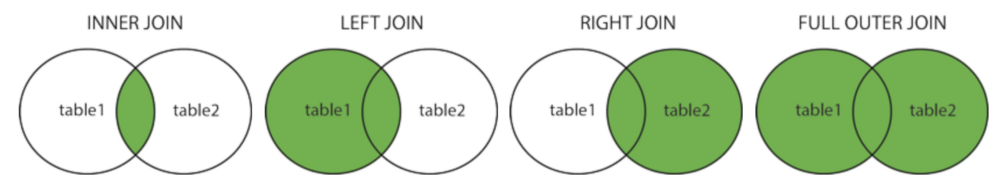

In [24]:
pd.merge(df_customer, df_info,on='id')

,id,name,age,address,company
0,1833,Lori Taylor,39,"14082 Catherine Street\nJameston, NM 79641","Norris, Cole and Garcia"
1,1947,William Wilson,21,"9699 Wright Spring\nAlexanderstad, MT 08207",James Inc
2,1140,Jason Jones,32,29024 Johnson Throughway Suite 850\nNorth Sand...,"Lowe, Byrd and Salinas"
3,1594,Joshua Hines,40,"24028 Robbins Meadows\nNorth Thomas, IL 99683",Graham-Simmons
4,1459,Mr. Patrick Franklin,56,"5649 Bolton Course\nEast Hollybury, UT 70887",Ellison-Smith
5,1330,Stephanie Lopez,21,"8800 Christopher Union Apt. 521\nGordonburgh, ...",Ford Ltd
6,1643,Patrick Brown,58,"269 Vang Dale\nWest Zachary, CT 57261","Hall, Fernandez and Brennan"
7,1389,Adam Mccormick,48,"46245 Smith Valley\nDodsonview, DE 96366",Green-Charles


In [25]:
pd.merge(df_customer, df_info,how='left',on='id')

,id,name,age,address,company
0,1833,Lori Taylor,39.0,"14082 Catherine Street\nJameston, NM 79641","Norris, Cole and Garcia"
1,1947,William Wilson,21.0,"9699 Wright Spring\nAlexanderstad, MT 08207",James Inc
2,1140,Jason Jones,32.0,29024 Johnson Throughway Suite 850\nNorth Sand...,"Lowe, Byrd and Salinas"
3,1594,Joshua Hines,40.0,"24028 Robbins Meadows\nNorth Thomas, IL 99683",Graham-Simmons
4,1459,Mr. Patrick Franklin,56.0,"5649 Bolton Course\nEast Hollybury, UT 70887",Ellison-Smith
5,1330,Stephanie Lopez,21.0,"8800 Christopher Union Apt. 521\nGordonburgh, ...",Ford Ltd
6,1643,Patrick Brown,58.0,"269 Vang Dale\nWest Zachary, CT 57261","Hall, Fernandez and Brennan"
7,1389,Adam Mccormick,48.0,"46245 Smith Valley\nDodsonview, DE 96366",Green-Charles
8,1967,Matthew Perez,NaN,NaN,NaN
9,1414,Amanda Rodriguez,NaN,NaN,NaN


### Union

Assuming we have another store with it's clients as follow:

In [26]:
ids = np.random.randint(1000, 2000, 4)
names = [fake.name() for i in range(4)]
df_customer_1 = pd.DataFrame({
    'id': ids,
    'name': names,
})

In [27]:
df_customer_1

,id,name
0,1855,Gregory Obrien
1,1725,Lindsey Davis
2,1814,Aaron Morris
3,1834,Nathan Brooks Jr.


We want to combine the **rows** of both tables to one table, this is called union in SQL and concat in Python:

In [ ]:
pd.concat([df_customer, df_customer_1])
#.loc[2], iloc[2]


,id,name
0,1186,Willie Wells
1,1028,Robert Johnson
2,1941,William Cole
3,1651,Kristopher Gibson
4,1733,April Thomas
5,1424,Charles Floyd
6,1950,Amanda Salazar
7,1972,Kelly Carpenter
8,1695,Dustin James
9,1613,Jason Miller


## Apply

 Manipulate columns and rows in a DataFrame with custom functions.

In [ ]:
csv_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv'
df = pd.read_csv(csv_url)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


For the purpose of this exercise slice the dataframe from 'school' until the 'guardian' column

In [ ]:
stud_alcoh = df.loc[: , "school":"guardian"]
stud_alcoh.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother
4,GP,F,16,U,GT3,T,3,3,other,other,home,father


Create a lambda function that will capitalize strings.

In [ ]:
capitalizer = lambda x: x.capitalize()

Capitalize both Mjob and Fjob

In [ ]:
stud_alcoh['Mjob'] = stud_alcoh['Mjob'].apply(capitalizer)
stud_alcoh['Fjob'] = stud_alcoh['Fjob'].apply(capitalizer)

In [ ]:
stud_alcoh.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,At_home,Other,course,father
2,GP,F,15,U,LE3,T,1,1,At_home,Other,other,mother
3,GP,F,15,U,GT3,T,4,2,Health,Services,home,mother
4,GP,F,16,U,GT3,T,3,3,Other,Other,home,father


Create a function called majority that returns a boolean value to a new column called legal_drinker (Consider majority as older than 17 years old)

In [ ]:
def majority(x):
    if x > 17:
        return True
    else:
        return False

In [ ]:
stud_alcoh['legal_drinker'] = stud_alcoh['age'].apply(majority)
stud_alcoh.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,legal_drinker
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,course,mother,True
1,GP,F,17,U,GT3,T,1,1,At_home,Other,course,father,False
2,GP,F,15,U,LE3,T,1,1,At_home,Other,other,mother,False
3,GP,F,15,U,GT3,T,4,2,Health,Services,home,mother,False
4,GP,F,16,U,GT3,T,3,3,Other,Other,home,father,False


Apply multiple columns

In [ ]:
def f(x):    
   return (x['G1'] + x['G2'] +x['G3'])/3

In [ ]:
 df.apply(f, axis=1)

0       5.666667
1       5.333333
2       8.333333
3      14.666667
4       8.666667
         ...    
390     9.000000
391    15.333333
392     8.333333
393    11.000000
394     8.666667
Length: 395, dtype: float64

In [ ]:
def f1(a, b, c):    
   return (a+b+c)/3

In [ ]:
df.apply(lambda x: f1(x['G1'], x['G2'], x['G3']), axis=1)

0       5.666667
1       5.333333
2       8.333333
3      14.666667
4       8.666667
         ...    
390     9.000000
391    15.333333
392     8.333333
393    11.000000
394     8.666667
Length: 395, dtype: float64

In [ ]:
df[['G1','G2','G3']].apply(lambda x: f1(*x), axis=1)

0       5.666667
1       5.333333
2       8.333333
3      14.666667
4       8.666667
         ...    
390     9.000000
391    15.333333
392     8.333333
393    11.000000
394     8.666667
Length: 395, dtype: float64

#Matplotlib

In [ ]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [ ]:
%matplotlib inline

##Plotting

In [ ]:
isr_covid = covid[covid.country=='Israel']
isr_covid.date = pd.to_datetime(isr_covid.date.astype(str))
isr_covid.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,new_calc,log_total
4226,Israel,ISR,2020-12-19,61.0,61.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,NaN,4.110874
4227,Israel,ISR,2020-12-20,7433.0,7433.0,NaN,7372.0,7372.0,0.09,0.09,NaN,852.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,737.2,8.913685
4228,Israel,ISR,2020-12-21,32304.0,32304.0,NaN,24871.0,16122.0,0.37,0.37,NaN,1863.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,1612.2,10.382946
4229,Israel,ISR,2020-12-22,76914.0,76914.0,NaN,44610.0,25618.0,0.89,0.89,NaN,2960.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,2561.8,11.250443
4230,Israel,ISR,2020-12-23,139726.0,139726.0,NaN,62812.0,34916.0,1.61,1.61,NaN,4034.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,3491.6,11.847439


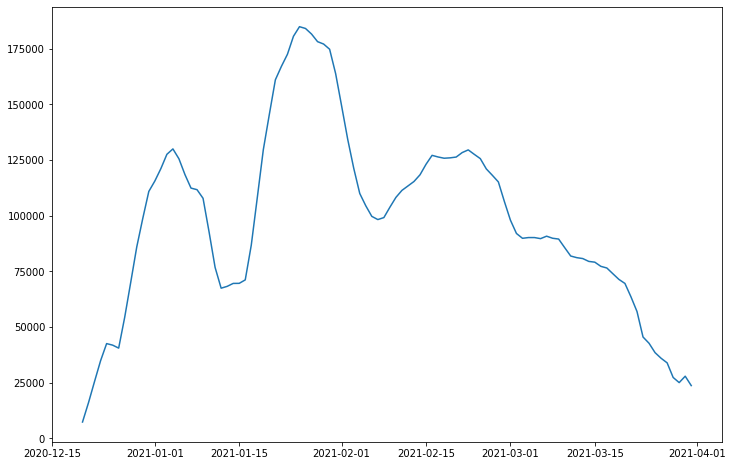

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(isr_covid['date'], isr_covid['daily_vaccinations'])

##Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

In [ ]:
import requests
from datetime import date, timedelta

today = date.today()
yesterday = today - timedelta(days=660)
country = "israel"
endpoint = f"https://api.covid19api.com/country/{country}"
params = {"from": str(yesterday), "to": str(today)}
response = requests.get(endpoint, params=params).json()

In [ ]:
response

[{'Active': 4634,
  'City': '',
  'CityCode': '',
  'Confirmed': 20676,
  'Country': 'Israel',
  'CountryCode': 'IL',
  'Date': '2020-06-20T00:00:00Z',
  'Deaths': 308,
  'ID': 'c8c01e09-3536-4323-897a-b3fa1e13a79a',
  'Lat': '31.05',
  'Lon': '34.85',
  'Province': '',
  'Recovered': 15734},
 {'Active': 4749,
  'City': '',
  'CityCode': '',
  'Confirmed': 20849,
  'Country': 'Israel',
  'CountryCode': 'IL',
  'Date': '2020-06-21T00:00:00Z',
  'Deaths': 308,
  'ID': 'b56866bc-2699-46ec-8a09-dd085189adc2',
  'Lat': '31.05',
  'Lon': '34.85',
  'Province': '',
  'Recovered': 15792},
 {'Active': 5025,
  'City': '',
  'CityCode': '',
  'Confirmed': 21194,
  'Country': 'Israel',
  'CountryCode': 'IL',
  'Date': '2020-06-22T00:00:00Z',
  'Deaths': 309,
  'ID': 'acd0c038-962a-4db0-aa3e-a621378f7ff5',
  'Lat': '31.05',
  'Lon': '34.85',
  'Province': '',
  'Recovered': 15860},
 {'Active': 5384,
  'City': '',
  'CityCode': '',
  'Confirmed': 21645,
  'Country': 'Israel',
  'CountryCode': 'IL',


In [ ]:
covid_cases = pd.DataFrame(response)

In [ ]:
covid_cases

,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,c8c01e09-3536-4323-897a-b3fa1e13a79a,Israel,IL,,,,31.05,34.85,20676,308,15734,4634,2020-06-20T00:00:00Z
1,b56866bc-2699-46ec-8a09-dd085189adc2,Israel,IL,,,,31.05,34.85,20849,308,15792,4749,2020-06-21T00:00:00Z
2,acd0c038-962a-4db0-aa3e-a621378f7ff5,Israel,IL,,,,31.05,34.85,21194,309,15860,5025,2020-06-22T00:00:00Z
3,6af093ae-3f1f-4120-b6d2-aafdde410fe2,Israel,IL,,,,31.05,34.85,21645,311,15950,5384,2020-06-23T00:00:00Z
4,b2fdb77c-9644-4f85-865d-e17bd03e738c,Israel,IL,,,,31.05,34.85,22132,314,16017,5801,2020-06-24T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,6660526b-243c-4ad2-b019-2d81773662fd,Israel,IL,,,,31.05,34.85,3974774,10555,0,3964219,2022-04-06T00:00:00Z
656,c334e333-6918-403d-800d-15df3e2dba87,Israel,IL,,,,31.05,34.85,3982524,10559,0,3971965,2022-04-07T00:00:00Z
657,ce7505de-cce4-4d7b-8aa1-c317645a9bdc,Israel,IL,,,,31.05,34.85,3987827,10559,0,3977268,2022-04-08T00:00:00Z
658,7c1ff630-b27a-4e7e-b5be-9ecd5241cb8c,Israel,IL,,,,31.05,34.85,3993515,10559,0,3982956,2022-04-09T00:00:00Z


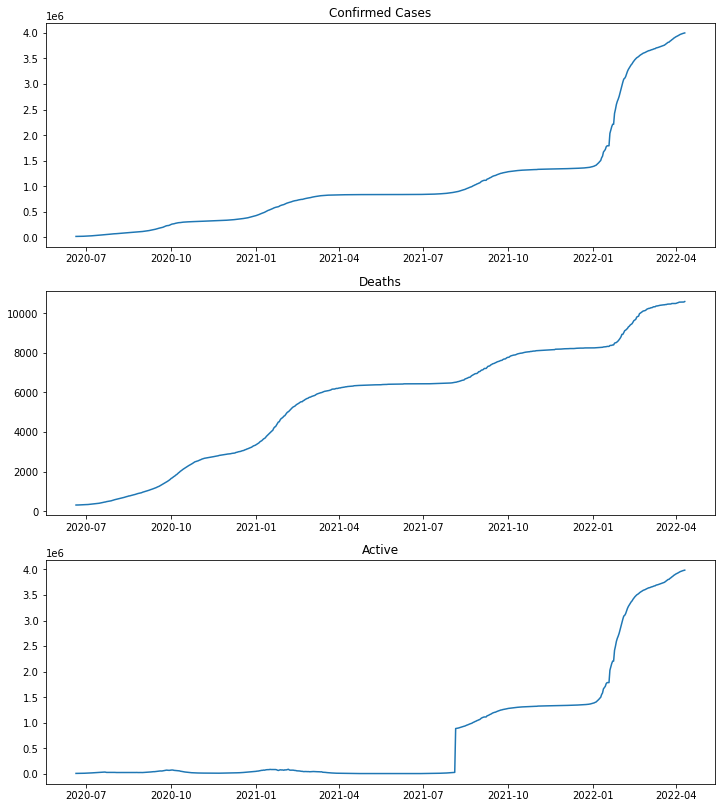

In [ ]:
# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.figure(figsize=(12,14))

# Make the first plot
plt.subplot(3, 1, 1)
plt.plot(pd.to_datetime( covid_cases['Date'].astype(str)), covid_cases['Confirmed'])
plt.title('Confirmed Cases')

# Set the second subplot as active, and make the second plot.
plt.subplot(3, 1, 2)
plt.plot(pd.to_datetime( covid_cases['Date'].astype(str)), covid_cases['Deaths'])
plt.title('Deaths')

# Set the second subplot as active, and make the second plot.
plt.subplot(3, 1, 3)
plt.plot(pd.to_datetime( covid_cases['Date'].astype(str)), covid_cases['Active'])
plt.title('Active')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).